In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook'])
cm = 1/2.54

In [2]:
pose_1 = jnp.load('data/pose_1.npz')
pose_2 = jnp.load('data/pose_2.npz')
pose_3 = jnp.load('data/pose_3.npz')
pose_4 = jnp.load('data/pose_4.npz')
pose_1.files

['joints',
 'geo_vals',
 'rot_errors',
 'pos_errors',
 'mass_vals',
 'jac_vals',
 'qdot_vals',
 'grav_vals',
 'pose_vals']

In [9]:
pose_4['joints'][0]*(180/jnp.pi)

array([[  74.62123 ],
       [  29.182653],
       [ -17.263586],
       [  96.28967 ],
       [  92.837   ],
       [-146.5252  ]], dtype=float32)

In [57]:
pose_1['pose_vals'][0], pose_2['pose_vals'][0], pose_3['pose_vals'][0], pose_3['pose_vals'][0]

(array([[-0.6329    , -0.4725    , -0.6134    , -0.1563    ],
        [-0.2479    ,  0.8742    , -0.41759998,  0.4887    ],
        [ 0.7335    , -0.1122    , -0.67039996,  0.3381    ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 array([[ 0.047     , -0.816     , -0.5761    , -0.0719    ],
        [-0.8541    ,  0.2662    , -0.4468    ,  0.54289997],
        [ 0.5179    ,  0.513     , -0.6845    ,  0.155     ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 array([[-0.182     , -0.6224    , -0.76119995, -0.1003    ],
        [-0.9781    ,  0.19399999,  0.0753    ,  0.3427    ],
        [ 0.1008    ,  0.7583    , -0.6441    ,  0.31      ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 array([[-0.182     , -0.6224    , -0.76119995, -0.1003    ],
        [-0.9781    ,  0.19399999,  0.0753    ,  0.3427    ],
        [ 0.1008    ,  0.7583    , -0.6441    ,  0.31      ]

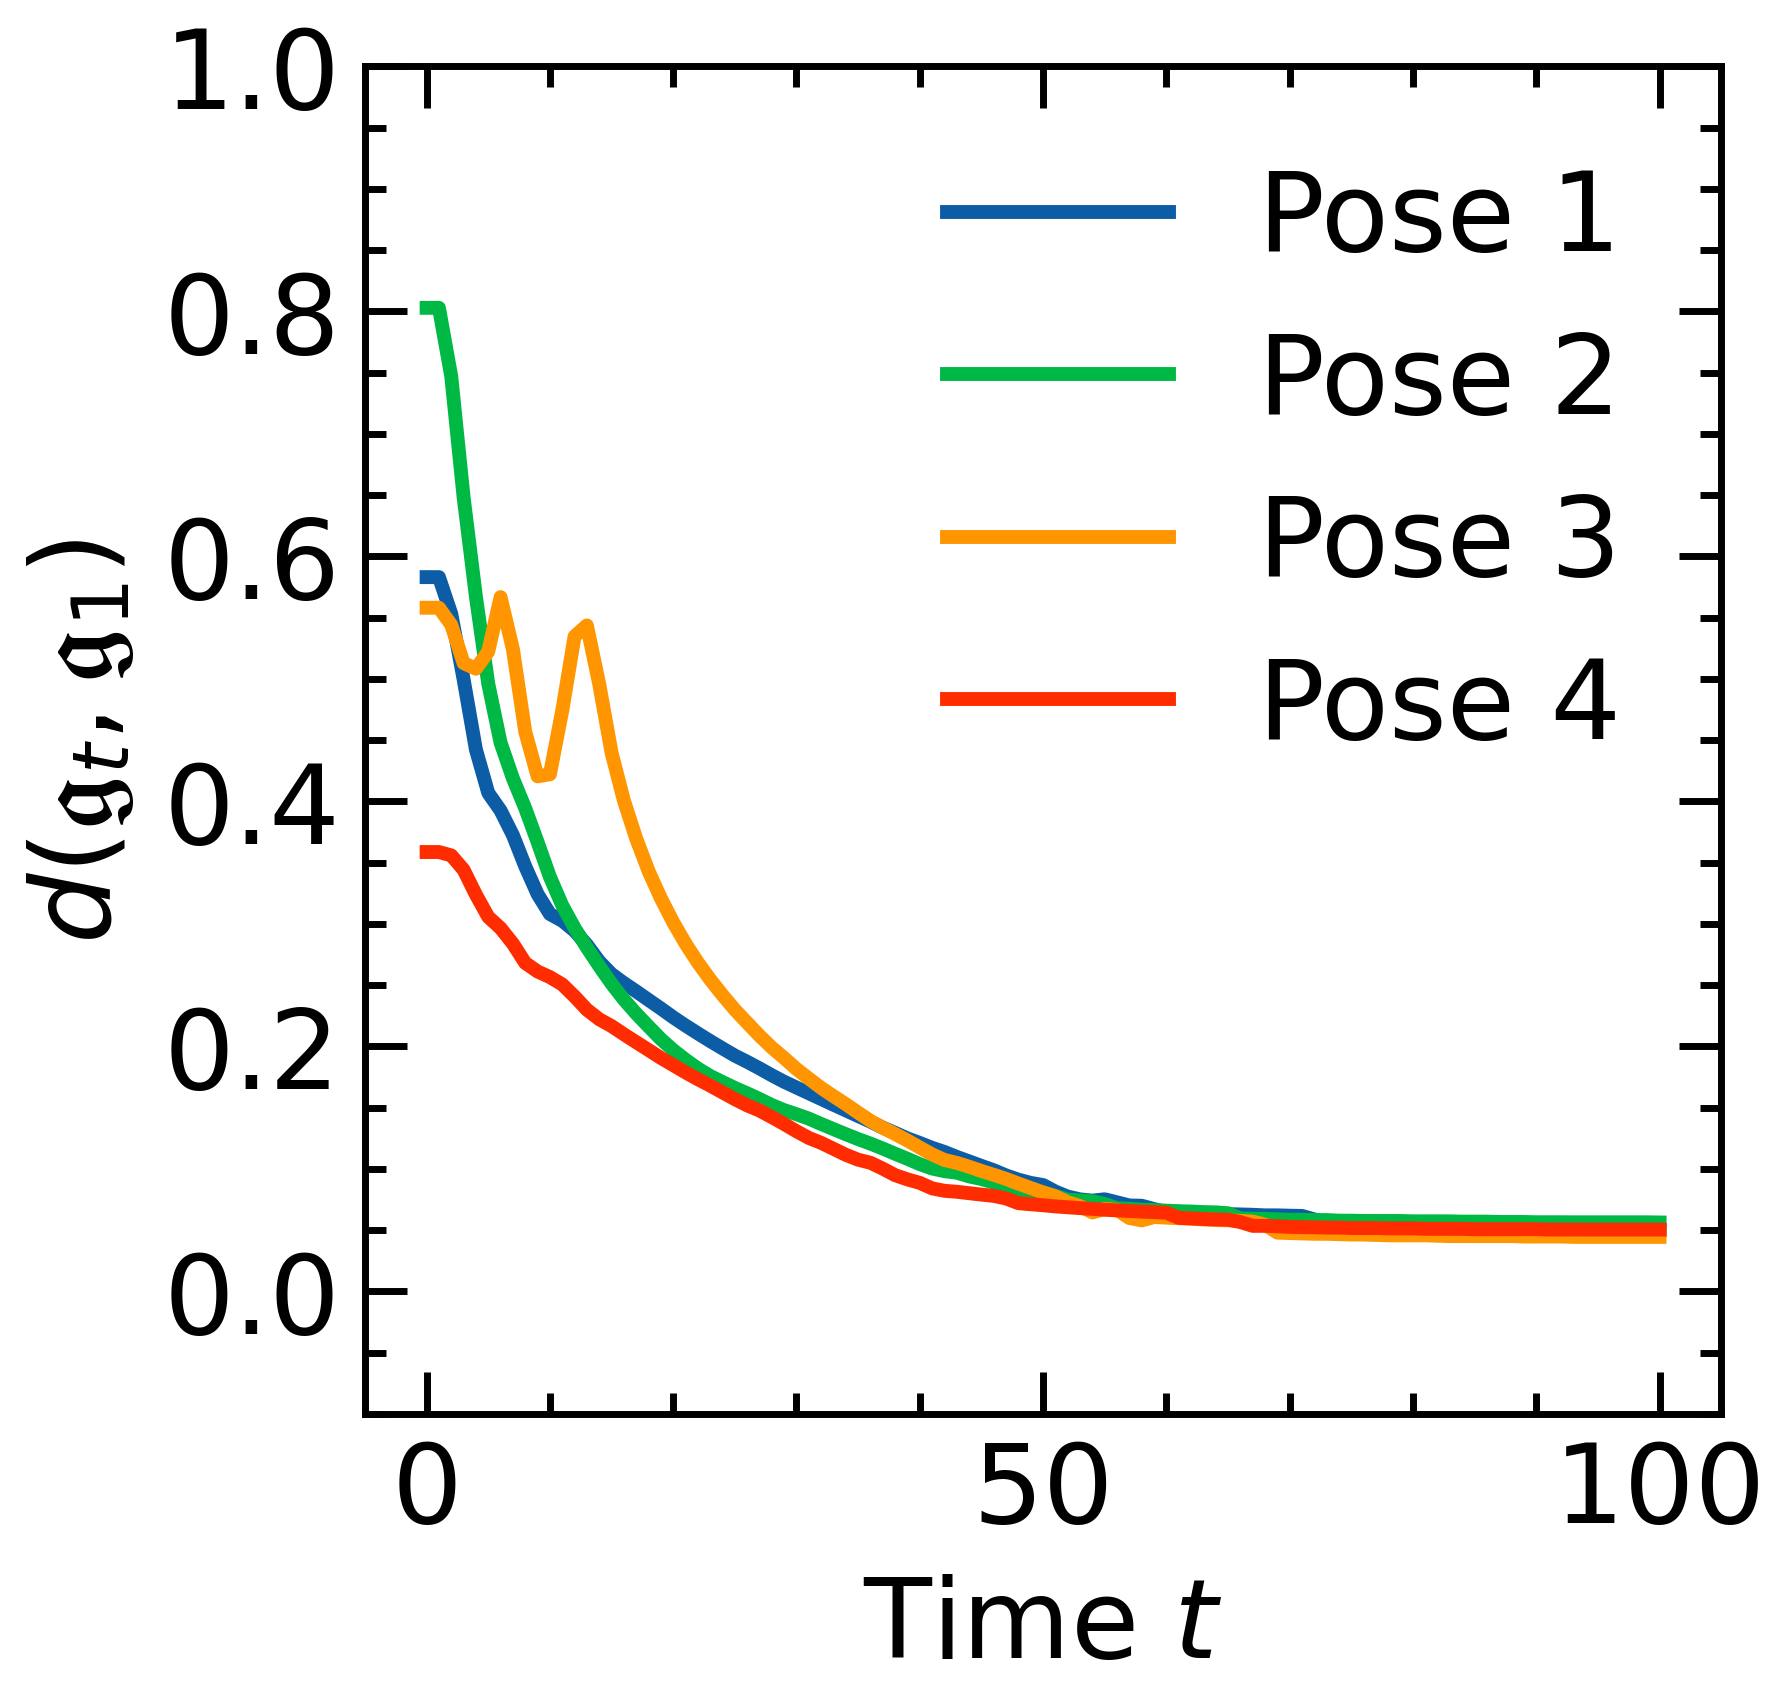

In [5]:
pose_1_geo_vals = pose_1['geo_vals'][0:101]
pose_2_geo_vals = pose_2['geo_vals'][0:101]
pose_3_geo_vals = pose_3['geo_vals'][0:101]
pose_4_geo_vals = pose_4['geo_vals'][0:101]

plt.figure(figsize=(8.89*cm,8.89*cm), dpi=500)
plt.ylim([-0.1, 1])
plt.xlabel('Time $t$')
plt.ylabel('$d(\mathfrak{g}_t, \mathfrak{g}_1)$')
plt.plot(pose_1_geo_vals)
plt.plot(pose_2_geo_vals)
plt.plot(pose_3_geo_vals)
plt.plot(pose_4_geo_vals)
plt.legend(['Pose 1', 'Pose 2', 'Pose 3', 'Pose 4'])
# plt.savefig('geodesic.png', dpi=500)
plt.show()

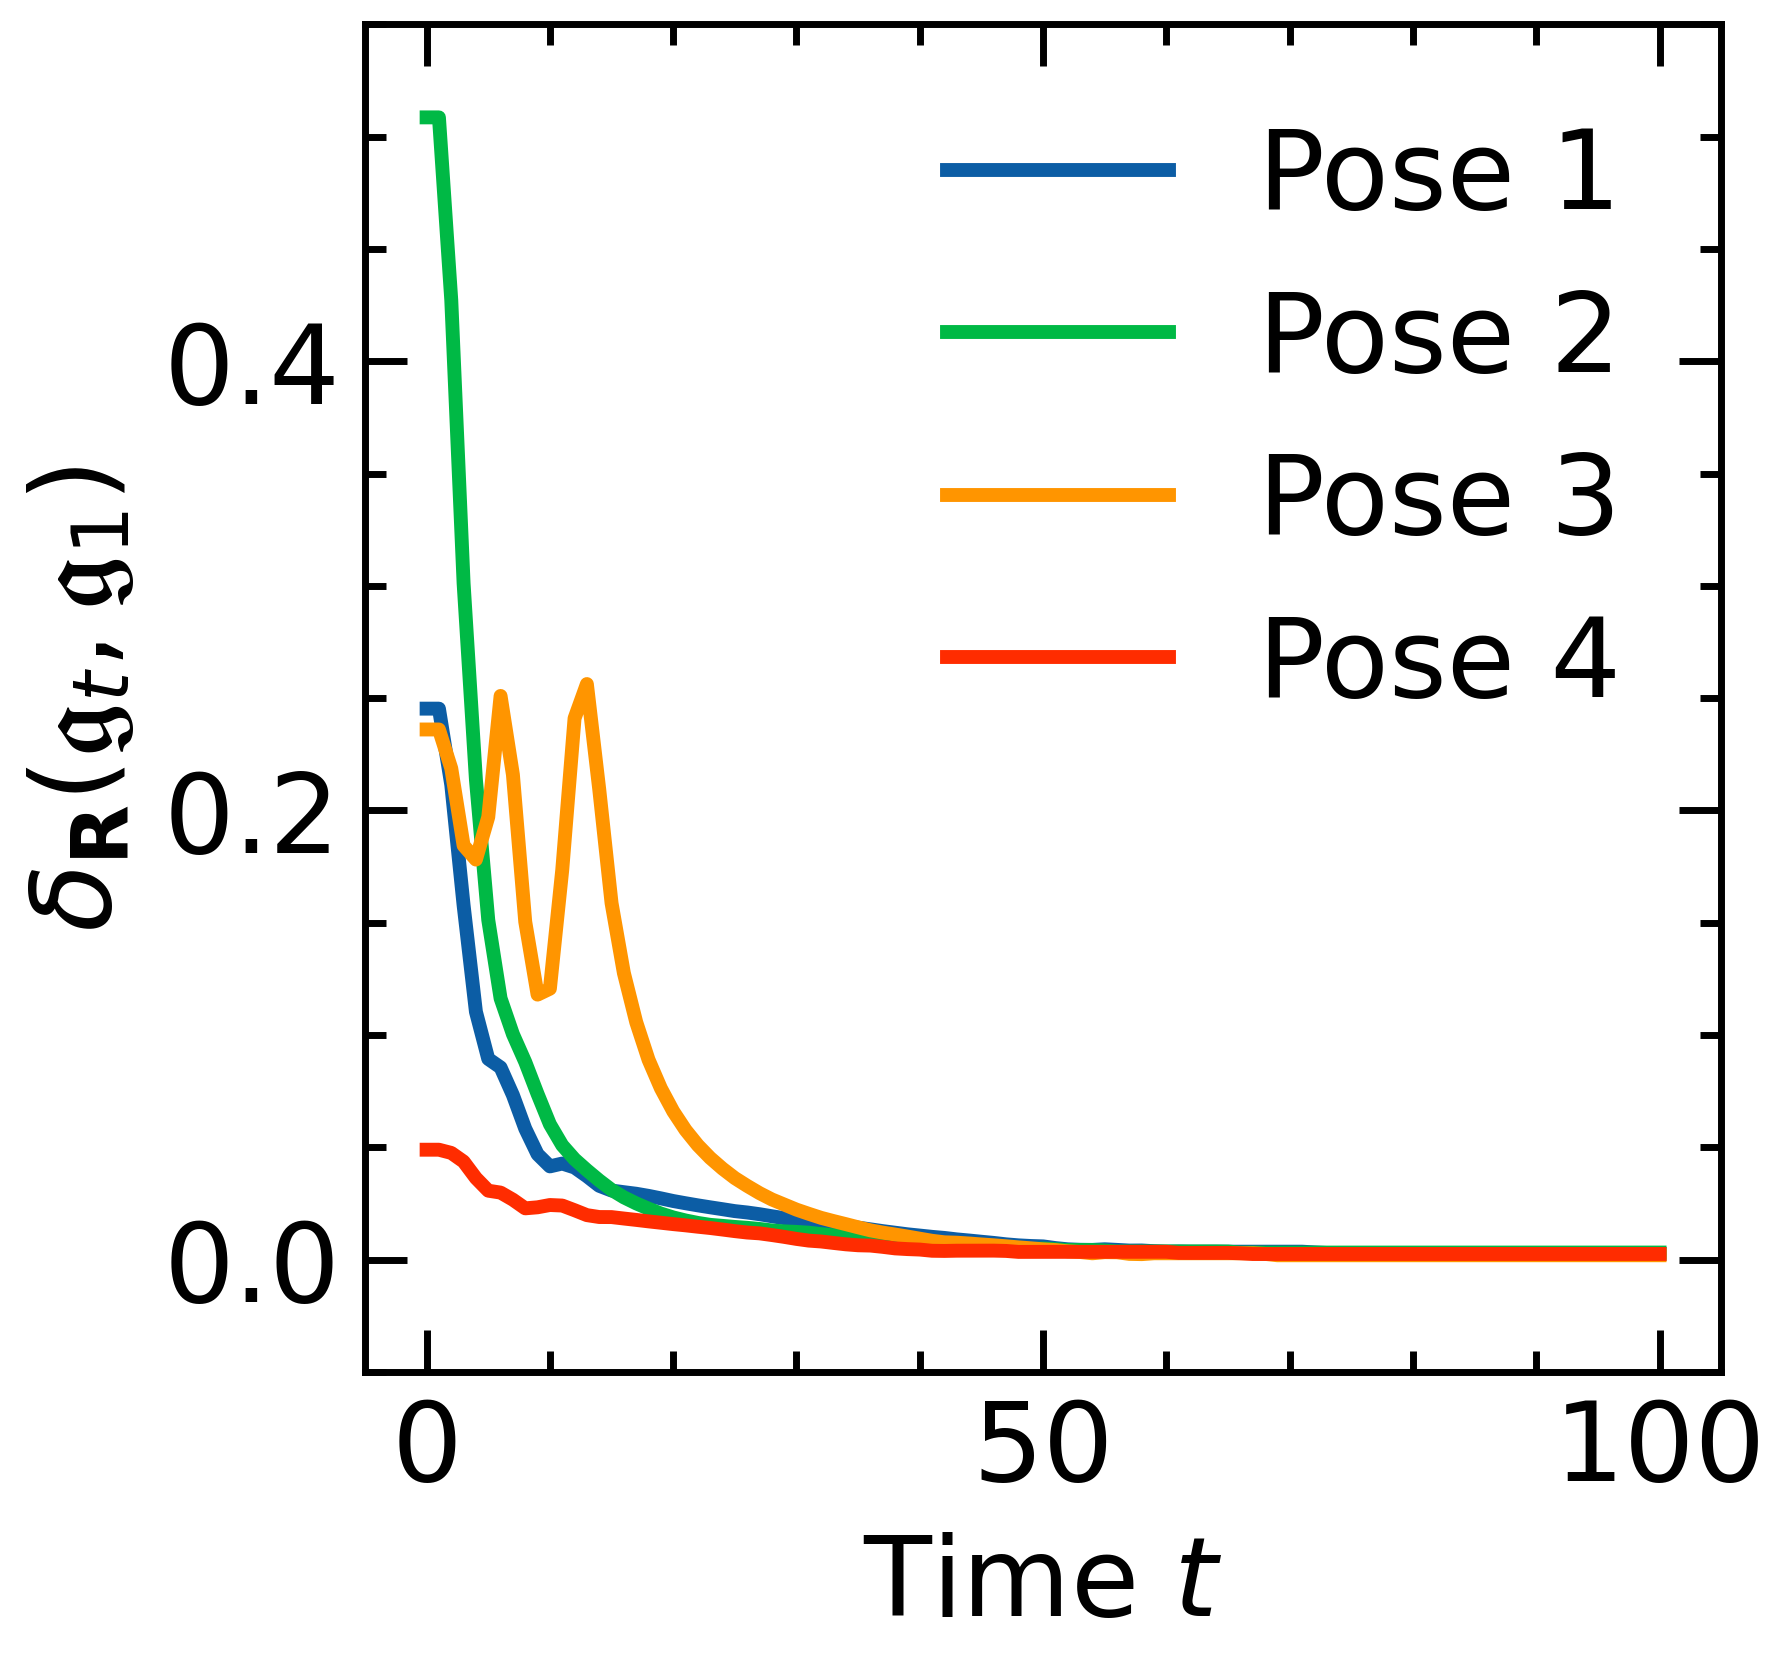

In [6]:
pose_1_rot_errors = pose_1['rot_errors'][0:101]
pose_2_rot_errors = pose_2['rot_errors'][0:101]
pose_3_rot_errors = pose_3['rot_errors'][0:101]
pose_4_rot_errors = pose_4['rot_errors'][0:101]

plt.figure(figsize=(8.89*cm,8.89*cm), dpi=500)
plt.ylim([-0.05, 0.55])
plt.xlabel('Time $t$')
plt.ylabel('$\delta_\mathbf{R}(\mathfrak{g}_t, \mathfrak{g}_1)$')
plt.plot(pose_1_rot_errors)
plt.plot(pose_2_rot_errors)
plt.plot(pose_3_rot_errors)
plt.plot(pose_4_rot_errors)
plt.legend(['Pose 1', 'Pose 2', 'Pose 3', 'Pose 4'])
# plt.savefig('rot_error.png', dpi=500)
plt.show()

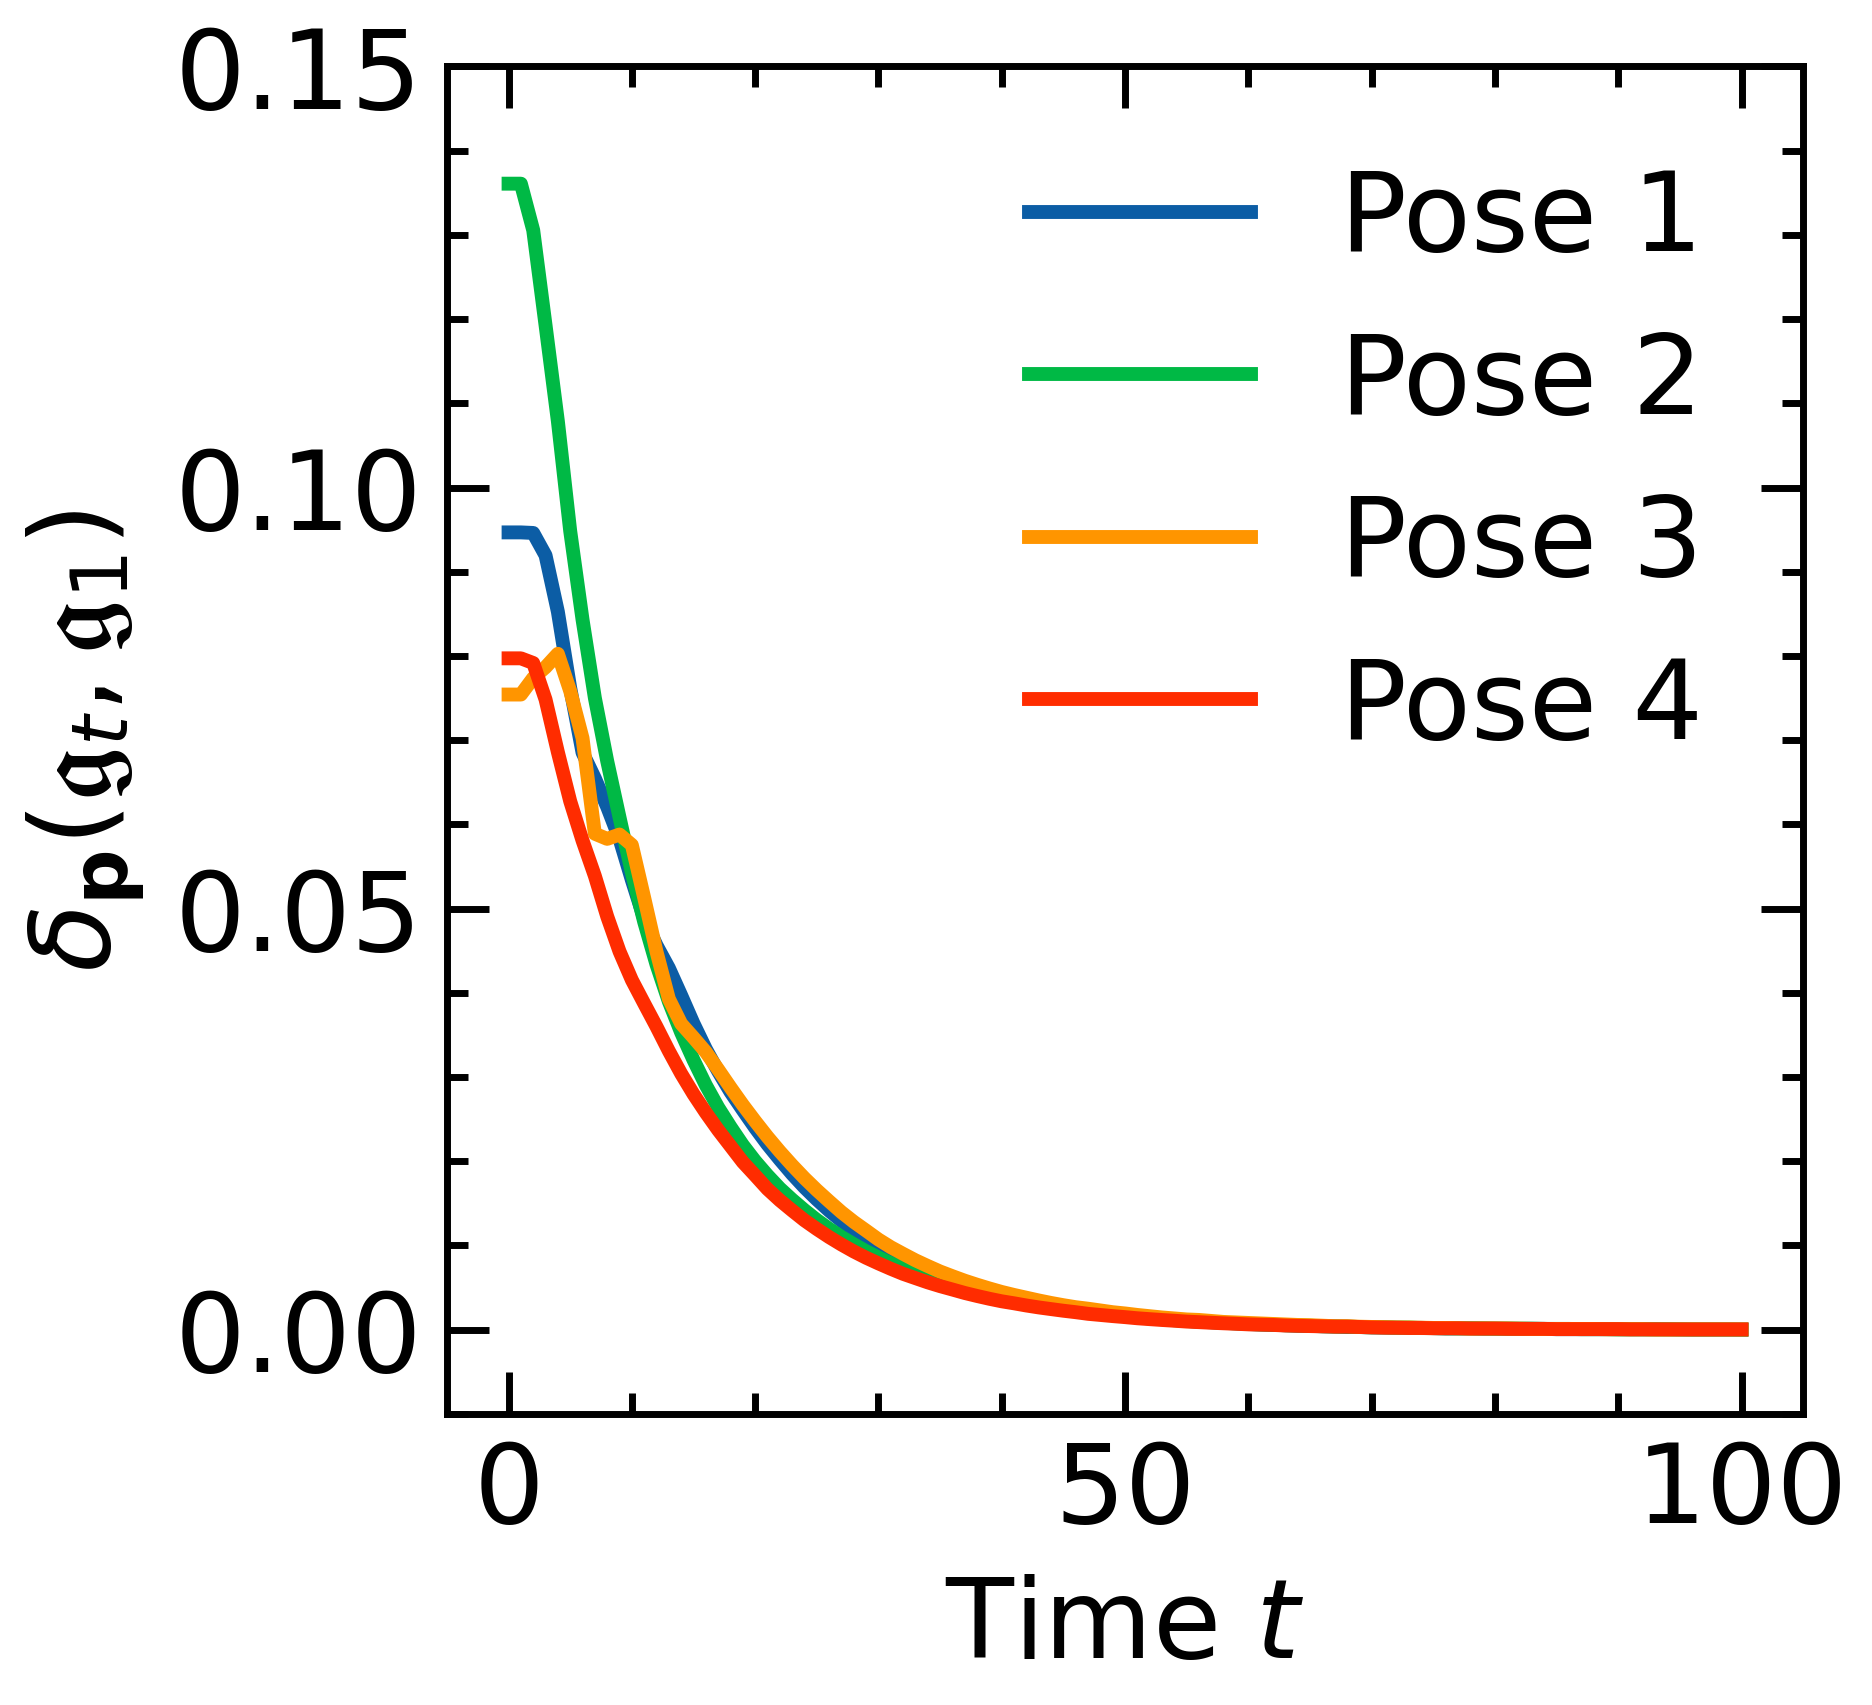

In [15]:
pose_1_pos_errors = pose_1['pos_errors'][0:101]
pose_2_pos_errors = pose_2['pos_errors'][0:101]
pose_3_pos_errors = pose_3['pos_errors'][0:101]
pose_4_pos_errors = pose_4['pos_errors'][0:101]

plt.figure(figsize=(8.89*cm,8.89*cm), dpi=500)
plt.ylim([-0.01, 0.15])
plt.xlabel('Time $t$')
plt.ylabel('$\delta_\mathbf{p}(\mathfrak{g}_t, \mathfrak{g}_1)$')
plt.plot(pose_1_pos_errors)
plt.plot(pose_2_pos_errors)
plt.plot(pose_3_pos_errors)
plt.plot(pose_4_pos_errors)
plt.legend(['Pose 1', 'Pose 2', 'Pose 3', 'Pose 4'])
# plt.savefig('pos_error.png', dpi=500)
plt.show()

In [107]:
pose_1_mass = pose_1['mass_vals']
pose_1_jac_vals = pose_1['jac_vals']
pose_1_qdot = pose_1['qdot_vals']
pose_1_tcp = pose_1_jac_vals @ pose_1_qdot

In [39]:
pose_1_pose = pose_1['pose_vals']
positions_1 = pose_1_pose[:,0:3,-1]
positions_1.shape

(200, 3)

[[ 0.047      -0.816      -0.5761     -0.0719    ]
 [-0.8541      0.2662     -0.4468      0.54289997]
 [ 0.5179      0.513      -0.6845      0.155     ]
 [ 0.          0.          0.          1.        ]]


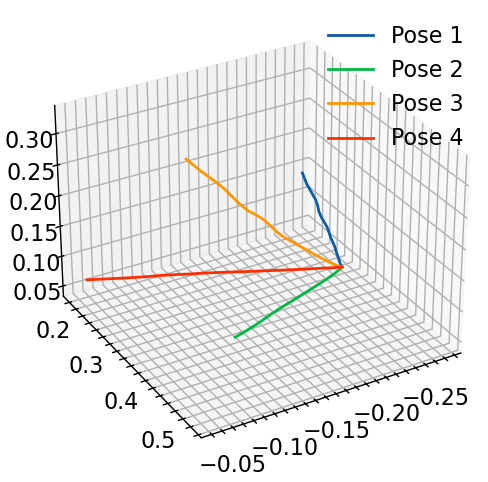

In [79]:
poses = [pose_1, pose_2, pose_3, pose_4]
print(poses[1]['pose_vals'][0])
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(azim=60, elev=30)
for i in range(0,4):
    pose = poses[i]['pose_vals']
    positions = pose[:,0:3,-1]
    x = positions[:,0]
    y = positions[:,1]
    z = positions[:,2]
    ax.plot(x,y,z, label=f'Pose {i+1}')
    ax.legend()
plt.show()